In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import sklearn
from PIL import Image
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import style
#style.use('ggplot')
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
#from cf_matrix import make_confusion_matrix
%matplotlib inline

In [3]:
img = Image.open("D:/whitefly v2/009.jpg")
(imageWidth, imageHeight)=img.size
print(imageWidth, imageHeight)

331 152


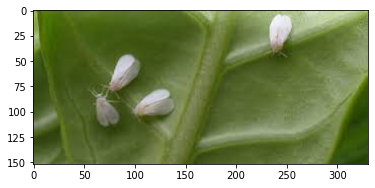

In [4]:
imgplot = plt.imshow(img)

In [5]:
n = 20

k = imageWidth/n
l = imageHeight/n

k = int(k)
l = int(l)

In [6]:
for i in range(0, l-1):
	for j in range(0, k-1):
		print(i," ",j," ",k," ",l," ",n)
		img2 = img.crop((i*n, j*n, n*i+n, n*j+n))
		img2.save("whitefly_test-row-"+str(i+1)+"-col-"+str(j+1)+".png")

0   0   16   7   20
0   1   16   7   20
0   2   16   7   20
0   3   16   7   20
0   4   16   7   20
0   5   16   7   20
0   6   16   7   20
0   7   16   7   20
0   8   16   7   20
0   9   16   7   20
0   10   16   7   20
0   11   16   7   20
0   12   16   7   20
0   13   16   7   20
0   14   16   7   20
1   0   16   7   20
1   1   16   7   20
1   2   16   7   20
1   3   16   7   20
1   4   16   7   20
1   5   16   7   20
1   6   16   7   20
1   7   16   7   20
1   8   16   7   20
1   9   16   7   20
1   10   16   7   20
1   11   16   7   20
1   12   16   7   20
1   13   16   7   20
1   14   16   7   20
2   0   16   7   20
2   1   16   7   20
2   2   16   7   20
2   3   16   7   20
2   4   16   7   20
2   5   16   7   20
2   6   16   7   20
2   7   16   7   20
2   8   16   7   20
2   9   16   7   20
2   10   16   7   20
2   11   16   7   20
2   12   16   7   20
2   13   16   7   20
2   14   16   7   20
3   0   16   7   20
3   1   16   7   20
3   2   16   7   20
3   3   16   7   20
3   4

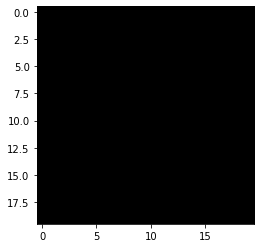

In [81]:
image = cv2.imread("D:/whitefly v2/whitefly_test-row-6-col-9.png")
imgplot = plt.imshow(image)

In [82]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [83]:
pixel_values = image.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

In [84]:
print(pixel_values.shape)

(400, 3)


In [85]:
pixel_values

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [86]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 60, 0.2)

In [87]:
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 60, cv2.KMEANS_RANDOM_CENTERS)

In [88]:
centers = np.uint8(centers)

labels = labels.flatten()

In [89]:
segmented_image = centers[labels.flatten()]

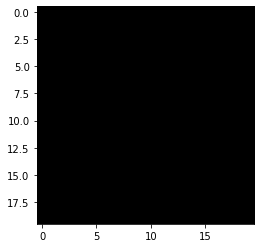

In [90]:
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

In [91]:
print(centers)

[[0 0 0]
 [0 0 0]]


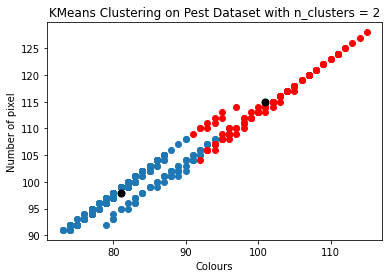

In [69]:
#filter rows of original data
A = pixel_values[labels == 0]
B = pixel_values[labels == 1]
 
#plotting the results
plt.title('KMeans Clustering on Pest Dataset with n_clusters = 2', loc='center', fontsize=12)
plt.scatter(A[:,0] , A[:,1], label = 'cluster 1')
plt.scatter(B[:,0] , B[:,1], c = 'r',label = 'cluster 2')
plt.scatter(centers[:,0] , centers[:,1] , s = 50, color = 'k')
plt.xlabel('Colours'),plt.ylabel('Number of pixel')
#plt.legend()
#plt.xlim(0, 100)
#plt.ylim(0, 60)
plt.show()

In [131]:
cf_matrix = np.array([[23,  5],
                      [ 3, 30]])

In [604]:
confusion_matrix(y_true, y_pred)

NameError: name 'y_true' is not defined

In [14]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='binary', title='My Two-class CF Matrix')

NameError: name 'make_confusion_matrix' is not defined

In [11]:
print(classification_report(y_true, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [12]:
model = KMeans(n_clusters=2)

In [36]:
model.fit(X_1)

KMeans(n_clusters=2)

In [37]:
model.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
model.cluster_centers_

array([[0.27473703, 0.40191537, 0.30389404, 0.55939806],
       [0.5925084 , 0.6707711 , 0.58339584, 0.3770002 ]], dtype=float32)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(A[0][:,0], A[0][:,1],c=model.labels_)
plt.scatter(A[:,0] , A[:,1], label = 'cluster 1')
plt.scatter(B[:,0] , B[:,1], c = 'r',label = 'cluster 2')
ax2.set_title('Original Data')

ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])

In [24]:
image_array_sample = shuffle(pixel_values, random_state=0)
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_array_sample)

In [25]:
labels = kmeans.predict(pixel_values)

In [22]:
#X, y = make_classification (labels) 
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(labels)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
cf_matrix = np.array([[23,  5],
                      [ 3, 30]])

In [26]:
img = mpimg.imread ('D:/whitefly v2/005.jpg')

In [27]:
A=img/255
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
ish=A.shape
X=np.zeros((ish[0]*ish[1],4),np.float32)
temp_1=np.zeros((ish[0],ish[1]),np.float32)
for i in range(0,ish[0],1):
    for j in range(0,ish[1],1):
        temp_1[i,j]=(i+j)/450

In [29]:
temp_1=np.reshape(temp_1,(ish[0]*ish[1]))        
A_new=np.reshape(A,(ish[0]*ish[1],ish[2]))

In [30]:
X[:,0:3]=A_new
X[:,3]=temp_1

In [31]:
X_1=np.float32(X)

In [33]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_1)

In [35]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
print(confusion_matrix, kmeans.labels_)

<function confusion_matrix at 0x0000020D13033948> [1 1 1 ... 0 0 0]


In [ ]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
labels = kmeans.fit_predict(pixel_values)
 
print(labels)

In [ ]:
print(confusion_matrix(cd['Cluster'],kmeans.labels_))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_train_pred = clf.predict(x_train)

In [ ]:
y_test_pred = clf.predict(x_test)

In [ ]:
import numpy as np
import urllib
# URL for the Pima Indians Diabetes dataset (UCI Machine Learning Repository)
url = "http://goo.gl/j0Rvxq"
raw_data = urllib.urlopen(url)                 # download the file
dataset = np.loadtxt(raw_data, delimiter=",")

In [19]:
from sklearn.datasets import load_sample_image
whitefly = load_sample_image("row-1-col-3.png")

AttributeError: Cannot find sample image: row-1-col-3.png

In [ ]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("/path/to/train_dataset.txt")

X_train, y_train, X_test, y_test = load_svmlight_files(
...     ("/path/to/train_dataset.txt", "/path/to/test_dataset.txt"))

In [20]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
labels = kmeans.fit_predict(pixel_values)
 
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [21]:
print(confusion_matrix, kmeans.labels_)

<function confusion_matrix at 0x000002987B24F948> [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [22]:
print(classification_report,kmeans.labels_)

<function classification_report at 0x000002987B2541F8> [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
